In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the data
df = pd.read_csv('../data/insurance_data.csv')

# 1. Data Summarization
print("\n=== Descriptive Statistics ===")
print(df.describe())

# 2. Data Quality Assessment
print("\n=== Missing Values ===")
print(df.isnull().sum())


C:\Users\HP\AppData\Local\Temp\ipykernel_9776\426246269.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/insurance_data.csv')



=== Descriptive Statistics ===
       UnderwrittenCoverID       PolicyID     PostalCode        mmcode  \
count        746097.000000  746097.000000  746097.000000  7.458410e+05   
mean         111792.900658    8611.710237    2692.257433  5.571746e+07   
std           59340.282010    4996.063645    2495.050245  1.249810e+07   
min             286.000000      49.000000       1.000000  4.041200e+06   
25%           72341.000000    5287.000000     470.000000  6.005692e+07   
50%          109434.000000    7490.000000    2000.000000  6.005842e+07   
75%          142318.000000   11586.000000    4068.000000  6.005842e+07   
max          301175.000000   23246.000000    9870.000000  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count     746097.000000  745841.000000  745841.000000  745841.000000   
mean        2010.189701       4.048475    2502.794189      98.077594   
std            3.315887       0.274893     388.647446      18.716007   
min         1

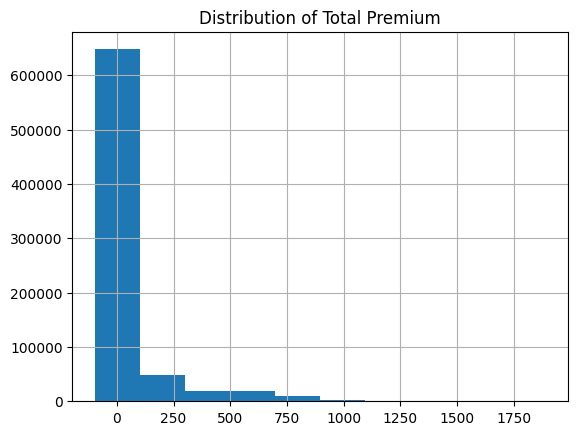

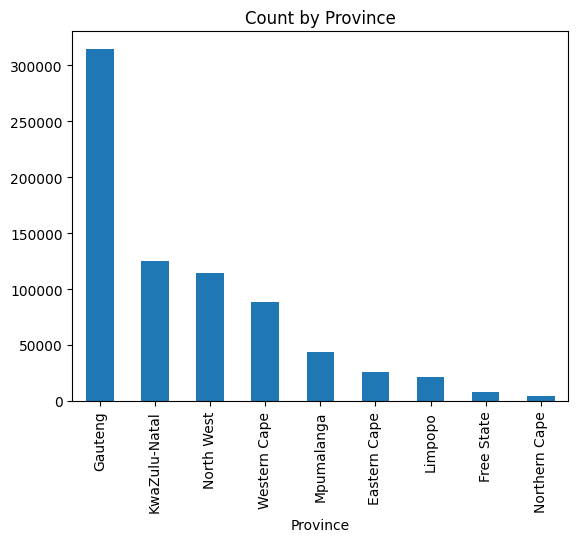

In [4]:


# Numeric column histogram
df['TotalPremium'].hist()
plt.title("Distribution of Total Premium")
plt.show()

# Categorical column count
df['Province'].value_counts().plot(kind='bar')
plt.title("Count by Province")
plt.show()


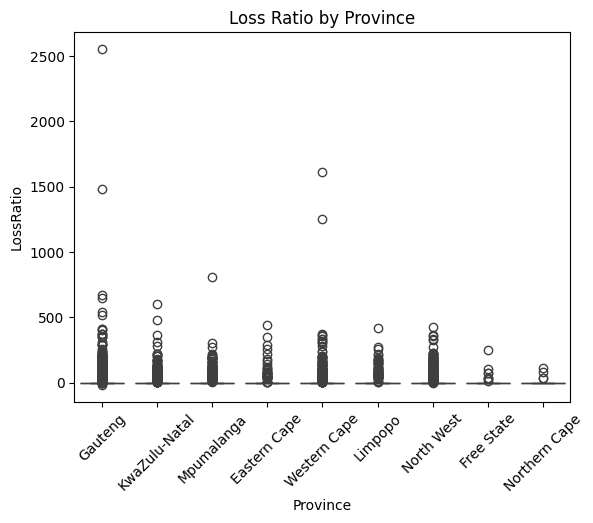

In [5]:
# Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Province
sns.boxplot(x='Province', y='LossRatio', data=df)
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()


<Axes: title={'center': 'Monthly Claims and Premiums'}, xlabel='TransactionMonth'>

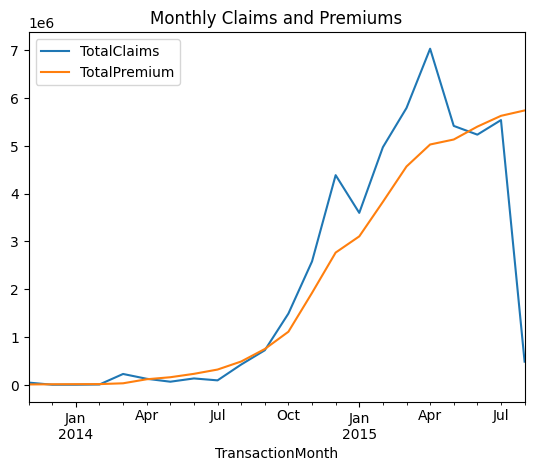

In [6]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period("M"))[['TotalClaims', 'TotalPremium']].sum()
monthly_claims.plot(title="Monthly Claims and Premiums")
